# Stellar Atmosphere Modeling


## Assignmen Outline

The [Geneva stellar evolutionary tracks](https://www.unige.ch/sciences/astro/evolution/en/research/geneva-grids-stellar-evolution-models/#grids92) provide a model grid of stellar parameters in different stages of a stars evolution.

The different models contain information for

- isochrones (**same age**, different masses) and
- evolutionary tracks (**one mass** over time).

## Getting The Data

For this assignment, we will use Grids of Stellar Models with Rotation, primarily using solar abundance models $(Z = 0.014)$.

You can download the tracks and isochrone grid on [VizieR](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=J/A%2bA/537/A146&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa).

To limit the output, you will need to specify:

- $Z = 0.014$ (and select it)
- Specify rotation models
- For isochrones: enter the age as $\log(t)$ in years. Example: for a $3\text{ Myr}$ isochrone, enter $6.5$
- For evolutionary tracks: enter the initial mass in solar masses
- Output the information in some plain text/ASCII friendly format (e.g. Tab separated, `;` separated, ascii text/plain) that will be downloaded. The default is an HTML table.

## Assignment Deliverables

With this information, I would like you to create **one** H-R diagram with the following:

1. The ZAMS over the mass range provided ($0.8-120\text{ M}_\odot$)
2. Denote where the Sun is located on the H-R diagram
3. Isochrones over a sampling of the available ages (e.g. $\log (t) = 6.5,\space 7.5,\space 8.5,\space 9.5,\space 10.1\text{ yr})$, showing how the Main Sequence changes over time.
4. Choose the evolutionary track of one star with $\text{M} \lt 8\text{M}_\odot$ and another with $\text{M} \gt 8\text{M}_\odot$, plot and label the tracks of these stars. Some accepted values for masses are: $0.8,\space 0.9,\space 1,\space 1.1,\space 1.25,\space 1.35,\space 1.5,\space 3,\space 4,\space 7,\space 20,\space 25,\space 32,\space 85,\space \&\space 120$.

Here is the [Jupyter Notebook (Google Colab)](https://drive.google.com/file/d/1WssGOFCsTnR66wHuPvpj1CHhfeKfyZWP/view?usp=sharing) to get you started. Make sure to include any references you use in creating this plot (e.g. solar values for Luminosity and temperature).

## Assignment Checklist

- [x]  Download data for isochrones and tracks (you can find the data I used [here](https://drive.google.com/drive/folders/1mQtRIIfWzJttUARNFIRKZ3fVu0-l4OgN?usp=sharing))
- [x]  Create one H-R diagram with the ZAMS over the mass range provided
- [x]  Denote where the Sun is located on the H-R diagram
- [x]  Plot isochrones over a sampling of the available ages
- [x]  Choose the evolutionary track of one star with $M \lt 8M_\odot$ and another with $M \gt 8M_\odot$, plot and label the tracks of these stars
- [x]  Include any references used in creating the plot

# Code

In [ ]:
import os
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Define Functions

In [ ]:
# define function to read data
def read_data(
    filenames,
    columns=None,
    labels=None,
    as_type=None,
    skip_rows=2,
    **kwargs,
):
    read_data = []
    for i, file in enumerate(filenames):
        DATA = pd.read_csv(file, **kwargs)

        if skip_rows:
            DATA = DATA.iloc[skip_rows:, :]
            DATA = DATA.reset_index()

        if columns:
            DATA = DATA[columns]

        if as_type:
            DATA = DATA.astype(as_type)

        if labels:
            DATA["Sort"] = labels[i]

        read_data.append(DATA)

    return read_data if len(filenames) > 1 else read_data[0]

# define helper function to list a directory to read files
def list_dir(rel_path):
    ABS = os.path.abspath(rel_path)
    listed_paths = os.listdir(rel_path)
    prepend = lambda path: os.path.join(ABS, path)
    return list(map(prepend, listed_paths))

# define function to unpack each column of a dataframe
def separate(dataframe):
    return tuple(dataframe[col] for col in dataframe.columns)


# define function to fix the formatting of data
def fix_data(*dataframes):
    returns = []
    for data in dataframes:
        data.sort_values(data.columns[0], inplace=True)
        data = data.astype(np.float64)
        data = (data.iloc[:, 1], data.iloc[:, 0])
        returns.append(data)

    return tuple(returns)


## Code Configuration

In [ ]:
CONFIG = {
    "isochrones": {
        "paths": list_dir("/content/drive/MyDrive/006_Courses/PS_401/A04_HR_diagrams/DATA/ISOCHRONES"),
        "ages": "6.5 7.5 8.5 9.5 10.1".split(),
    },
    "tracks": {
        "paths": list_dir("/content/drive/MyDrive/006_Courses/PS_401/A04_HR_diagrams/DATA/EVOLUTION_TRACKS"),
        "masses": "0.8 0.9 1 1.1 1.25 1.35 1.5 3 4 7 20 25 32 85 120".split(),
    },
    "read kwargs": {"delim_whitespace": True, "comment": "#", "on_bad_lines": "skip"},
    "plotted columns": ["logL", "logTe"],
    "axis labels": (r"$\log(L)$", r"$\log(T_{eff})$"),
    "colors": "c blue pink g m".split(),
    "sun vals": (3.761, 0),
}

## Read Data & Prepare For Plotting


In [ ]:
track0, track1, track2, track3, track4 = fix_data(
    *tuple(
        read_data(
            CONFIG["isochrones"]["paths"],
            columns=CONFIG["plotted columns"],
            **CONFIG["read kwargs"],
        )
    )
)

track_data_ZAMS = pd.concat(
    read_data(
        CONFIG["tracks"]["paths"],
        columns=CONFIG["plotted columns"],
        **CONFIG["read kwargs"],
    ),
)


ZAMS = (track_data_ZAMS.iloc[:, 1], track_data_ZAMS.iloc[:, 0])

## Plot Data

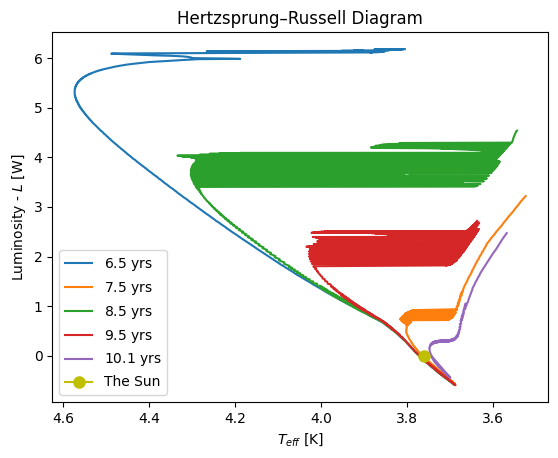

In [ ]:
# create plot figure
fig, axes = plt.subplots()

# plot isochrones
axes.plot(*track0, label=r"$6.5$ yrs")
axes.plot(*track1, label=r"$7.5$ yrs")
axes.plot(*track2, label=r"$8.5$ yrs")
axes.plot(*track3, label=r"$9.5$ yrs")
axes.plot(*track4, label=r"$10.1$ yrs")
axes.plot(*CONFIG["sun vals"], "y", marker="o", markersize=8, label="The Sun")
# axes.plot(*ZAMS, label="ZAMS")

# set title and axes labels
axes.set_title("Hertzsprung–Russell Diagram")
axes.set_ylabel(r"Luminosity - $L$ [W]")
axes.set_xlabel(r"$T_{eff}$ [K]")
axes.invert_xaxis()
axes.legend()

# Problem Answers

## Question 1

<u>**Prompt**</u>:
> *What information from the models do you need to build your ZAMS?*

<u>**My Response**</u>:
> To build the data form the zero-age main sequence stars (ZAMS), it requires the initial temperature, $T_\text{eff}$,  and luminosity, $L$, where you will combine all of the data files into a single `pd.DataFrame()` object to then plot in the HR diagram.

## Question 2


<u>**Prompt**</u>:
> *What information about the Sun do you need to include it on your HR-Diagram? Provide your reference for this information.*

<u>**My Response**</u>:
> Including the Sun on the HR-Diagram requires the luminosity and effective temperature $(T_\text{eff}$ and $L)$ values, gathered from NASA's official website. These will then be used to plot the single point in the HR diagram.